In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# データ確認

In [4]:
import pandas as pd

df = pd.read_csv("./dataset/train.csv")
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


とりあえず可視化する

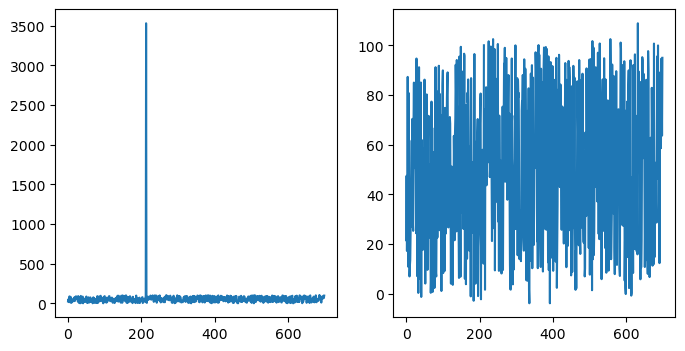

In [5]:
import matplotlib.pyplot as plt

def plot_xy(df:pd.DataFrame):
    fig = plt.figure(figsize=[8,4])
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.plot(df["x"])
    ax2.plot(df["y"])

plot_xy(df=df)

あまりにもひどい外れ値があるので確認。

In [6]:
i_xmax = df['x'].argmax()
print(f"x_max={df['x'].max()} when index={i_xmax}")
print(f"y[i_max]={df['y'][i_xmax]}")

x_max=3530.15736917 when index=213
y[i_max]=nan


- xの外れ値は、yでは欠損値となっている。
- 他に欠損値がないか確認する。

In [7]:
df.isnull().sum()

x    0
y    1
dtype: int64

欠損値は213番目のみなのでとりあえず削除する

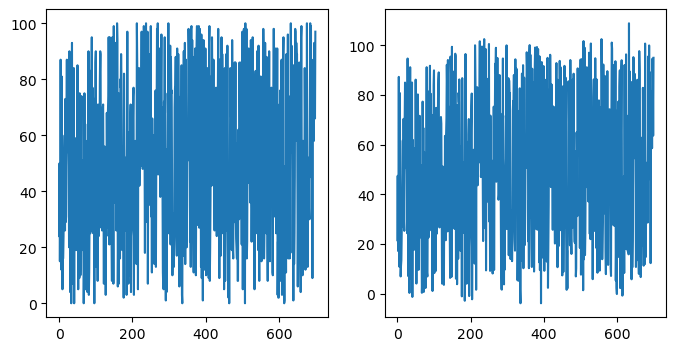

In [8]:
df_nandroped = df.dropna(how="any")

plot_xy(df=df_nandroped)

ひとまずひどい外れ値は無くなったので、ヒストグラムで可視化

(array([ 9., 17., 23., 29., 24., 21., 30., 34., 27., 25., 24., 19., 25.,
        38., 33., 33., 25., 28., 15., 18., 28., 24., 18., 28., 29., 22.,
        30., 18.,  4.,  1.]),
 array([-3.83998112e+00, -8.29278060e-02,  3.67412551e+00,  7.43117882e+00,
         1.11882321e+01,  1.49452854e+01,  1.87023388e+01,  2.24593921e+01,
         2.62164454e+01,  2.99734987e+01,  3.37305520e+01,  3.74876053e+01,
         4.12446586e+01,  4.50017120e+01,  4.87587653e+01,  5.25158186e+01,
         5.62728719e+01,  6.00299252e+01,  6.37869785e+01,  6.75440318e+01,
         7.13010852e+01,  7.50581385e+01,  7.88151918e+01,  8.25722451e+01,
         8.63292984e+01,  9.00863517e+01,  9.38434050e+01,  9.76004584e+01,
         1.01357512e+02,  1.05114565e+02,  1.08871618e+02]),
 <BarContainer object of 30 artists>)

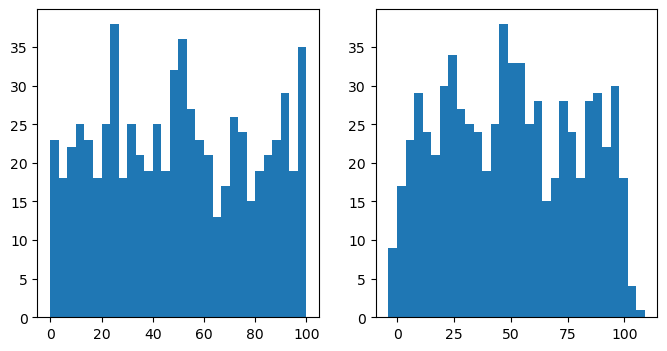

In [9]:
fig = plt.figure(figsize=[8, 4])

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(df_nandroped["x"], bins=30)
ax2.hist(df_nandroped["y"], bins=30)

特に正規分布というわけではなさそう。次に散布図を作成。

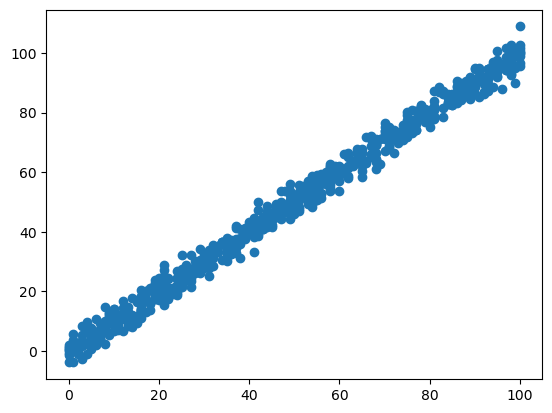

In [10]:
plt.figure()
plt.scatter(df_nandroped["x"], df_nandroped["y"])

- かなり綺麗な直線となっている
- 正規化せずともうまくいきそうなので、シンプルに線形回帰を行う

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=df_nandroped["x"].values.reshape(-1,1), y=df_nandroped["y"].values)

LinearRegression()

In [12]:
y_pred = model.predict(X=df_nandroped["x"].values.reshape(-1,1))

0.9907015319025518


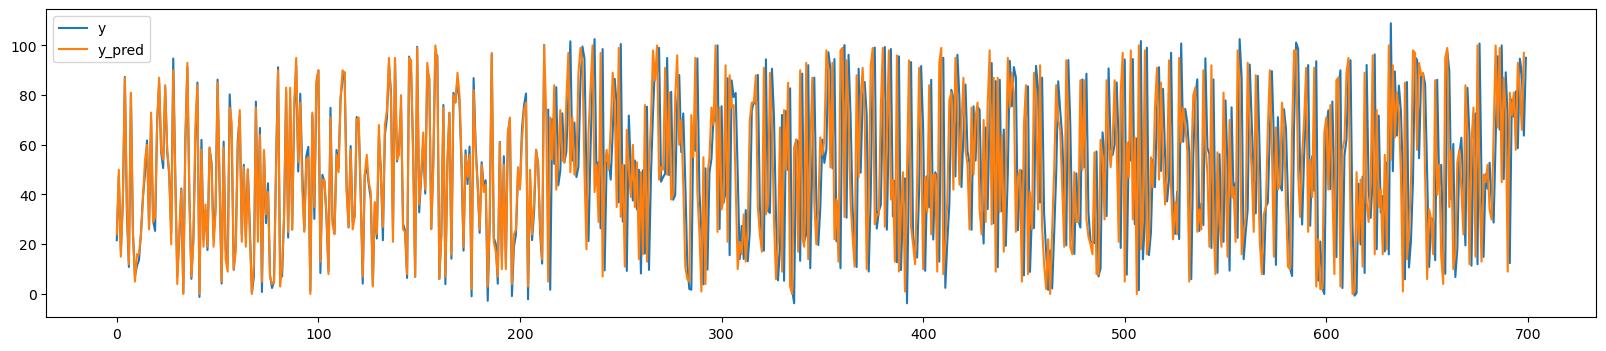

In [13]:
plt.figure(figsize=(20,4))
plt.plot(df["y"], label="y")
plt.plot(y_pred, label="y_pred")
plt.legend()

print(model.score(X=df_nandroped["x"].values.reshape(-1,1), y=df_nandroped["y"].values))

テストデータで評価

In [14]:
df_test = pd.read_csv("./dataset/test.csv")
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


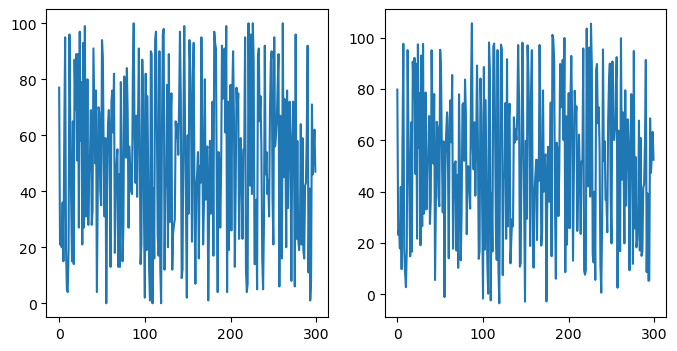

In [15]:
plot_xy(df=df_test)

In [16]:
df_test.isnull().sum()

x    0
y    0
dtype: int64

欠損値も外れ値もないので、とりあえずそのままモデルに予測させる。

0.9888014444327563


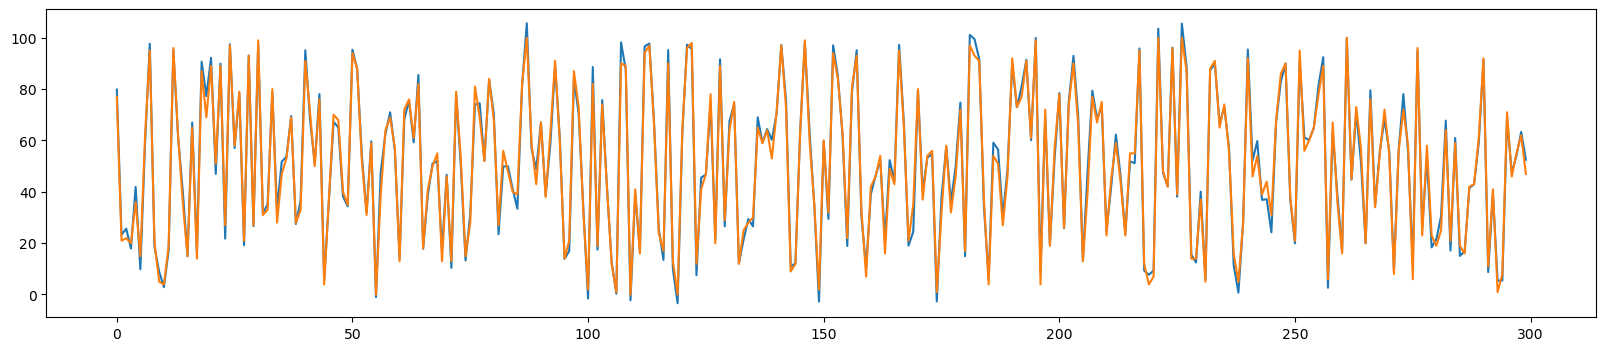

In [17]:
print(model.score(df_test["x"].values.reshape(-1, 1), df_test["y"].values))

plt.figure(figsize=[20, 4])
plt.plot(df_test["y"])
plt.plot(model.predict(X=df_test["x"].values.reshape(-1, 1)))

In [18]:
model

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}